<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_3_0_7_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.3_0.7'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.622808,60.008864,22.248108,38.497661,0.188110,166.565550,166.455747,0.109803
1,0.0,1.0,83.677606,36.668506,84.197489,24.397574,-0.027921,238.913255,239.043259,-0.130005
2,0.0,2.0,85.151098,82.864611,99.509399,43.273044,0.564851,321.363003,320.895466,0.467537
3,0.0,3.0,23.533980,78.042382,46.921980,74.565568,-0.470046,232.593863,233.204429,-0.610566
4,0.0,4.0,92.959735,78.939152,56.679023,82.483451,-0.607253,320.454107,320.961707,-0.507600
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.500652,78.165318,32.459839,71.089219,1.716172,242.931199,241.072736,1.858463
249996,999.0,246.0,21.669626,66.636909,70.999939,53.079431,0.218333,222.604239,222.260094,0.344144
249997,999.0,247.0,82.487086,74.975542,31.648297,61.072746,-0.570674,259.612996,260.188507,-0.575511
249998,999.0,248.0,85.643837,82.471086,73.535885,95.884166,1.290910,348.825884,347.504420,1.321464


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.622808  60.008864  22.248108  38.497661  0.188110  166.565550   
      1.0    83.677606  36.668506  84.197489  24.397574 -0.027921  238.913255   
      2.0    85.151098  82.864611  99.509399  43.273044  0.564851  321.363003   
      3.0    23.533980  78.042382  46.921980  74.565568 -0.470046  232.593863   
      4.0    92.959735  78.939152  56.679023  82.483451 -0.607253  320.454107   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  49.500652  78.165318  32.459839  71.089219  1.716172  242.931199   
      246.0  21.669626  66.636909  70.999939  53.079431  0.218333  222.604239   
      247.0  82.487086  74.975542  31.648297  61.072746 -0.570674  259.612996   
      248.0  85.643837  82.471086  73.535885  95.884166  1.290910  348.825884   
      249.0  60.274279  73.483592  66.892278  96.972260 -0.098831  307.523578   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    166.455747  0.109803  
      1.0    239.043259 -0.130005  
      2.0    320.895466  0.467537  
      3.0    233.204429 -0.610566  
      4.0    320.961707 -0.507600  
...                 ...       ...  
999.0 245.0  241.072736  1.858463  
      246.0  222.260094  0.344144  
      247.0  260.188507 -0.575511  
      248.0  347.504420  1.321464  
      249.0  307.514260  0.009318  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.622808  60.008864  22.248108  38.497661  0.188110  166.565550   
      1.0    83.677606  36.668506  84.197489  24.397574 -0.027921  238.913255   
      2.0    85.151098  82.864611  99.509399  43.273044  0.564851  321.363003   
      3.0    23.533980  78.042382  46.921980  74.565568 -0.470046  232.593863   
      4.0    92.959735  78.939152  56.679023  82.483451 -0.607253  320.454107   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  49.500652  78.165318  32.459839  71.089219  1.716172  242.931199   
      246.0  21.669626  66.636909  70.999939  53.079431  0.218333  222.604239   
      247.0  82.487086  74.975542  31.648297  61.072746 -0.570674  259.612996   
      248.0  85.643837  82.471086  73.535885  95.884166  1.290910  348.825884   
      249.0  60.274279  73.483592  66.892278  96.972260 -0.098831  307.523578   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    166.455747  0.109803  
      1.0    239.043259 -0.130005  
      2.0    320.895466  0.467537  
      3.0    233.204429 -0.610566  
      4.0    320.961707 -0.507600  
...                 ...       ...  
999.0 245.0  241.072736  1.858463  
      246.0  222.260094  0.344144  
      247.0  260.188507 -0.575511  
      248.0  347.504420  1.321464  
      249.0  307.514260  0.009318  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.622808,60.008864,22.248108,38.497661,0.188110,166.565550,166.455747,0.109803
1,0.0,1.0,83.677606,36.668506,84.197489,24.397574,-0.027921,238.913255,239.043259,-0.130005
2,0.0,2.0,85.151098,82.864611,99.509399,43.273044,0.564851,321.363003,320.895466,0.467537
3,0.0,3.0,23.533980,78.042382,46.921980,74.565568,-0.470046,232.593863,233.204429,-0.610566
4,0.0,4.0,92.959735,78.939152,56.679023,82.483451,-0.607253,320.454107,320.961707,-0.507600
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.500652,78.165318,32.459839,71.089219,1.716172,242.931199,241.072736,1.858463
249996,999.0,246.0,21.669626,66.636909,70.999939,53.079431,0.218333,222.604239,222.260094,0.344144
249997,999.0,247.0,82.487086,74.975542,31.648297,61.072746,-0.570674,259.612996,260.188507,-0.575511
249998,999.0,248.0,85.643837,82.471086,73.535885,95.884166,1.290910,348.825884,347.504420,1.321464


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.622808  60.008864  22.248108  38.497661  0.188110  166.565550   
      1.0    83.677606  36.668506  84.197489  24.397574 -0.027921  238.913255   
      2.0    85.151098  82.864611  99.509399  43.273044  0.564851  321.363003   
      3.0    23.533980  78.042382  46.921980  74.565568 -0.470046  232.593863   
      4.0    92.959735  78.939152  56.679023  82.483451 -0.607253  320.454107   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  49.500652  78.165318  32.459839  71.089219  1.716172  242.931199   
      246.0  21.669626  66.636909  70.999939  53.079431  0.218333  222.604239   
      247.0  82.487086  74.975542  31.648297  61.072746 -0.570674  259.612996   
      248.0  85.643837  82.471086  73.535885  95.884166  1.290910  348.825884   
      249.0  60.274279  73.483592  66.892278  96.972260 -0.098831  307.523578   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    166.455747  0.109803  
      1.0    239.043259 -0.130005  
      2.0    320.895466  0.467537  
      3.0    233.204429 -0.610566  
      4.0    320.961707 -0.507600  
...                 ...       ...  
999.0 245.0  241.072736  1.858463  
      246.0  222.260094  0.344144  
      247.0  260.188507 -0.575511  
      248.0  347.504420  1.321464  
      249.0  307.514260  0.009318  

[250000 rows x 8 columns]

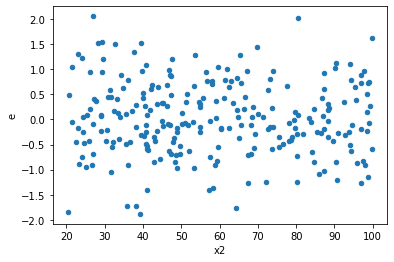

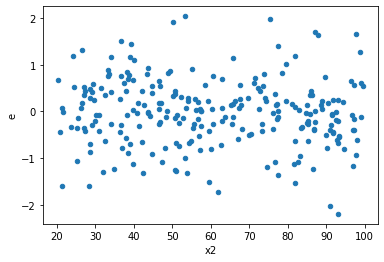

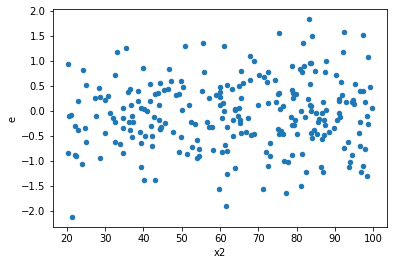

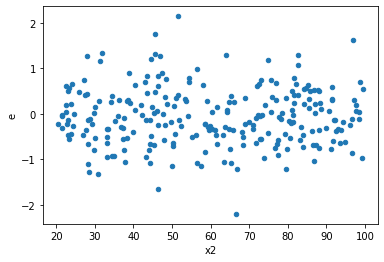

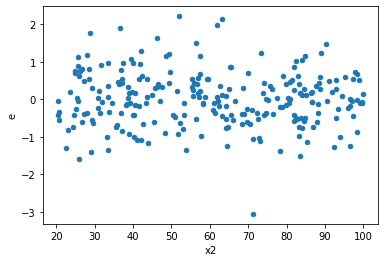

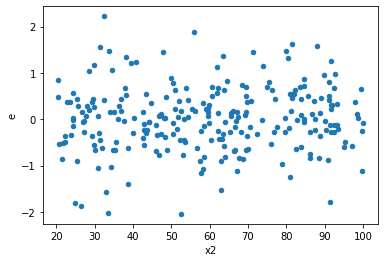

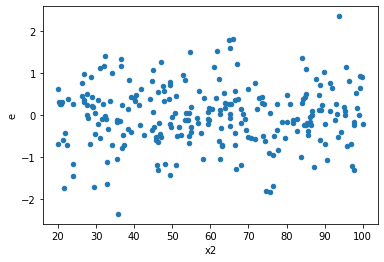

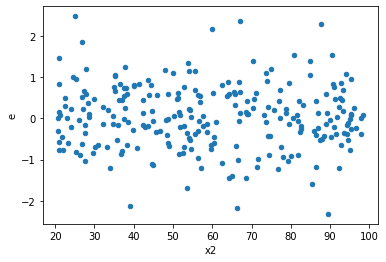

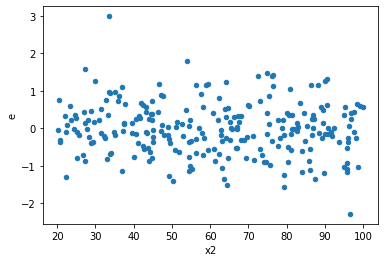

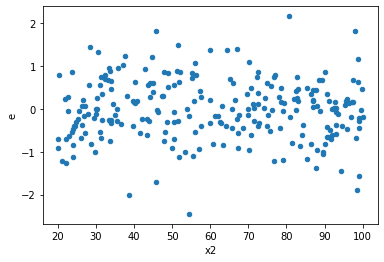

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
7.0,126.0,116.0,61.54288313581452,62.49706818451584,0.48843558044297236,0.5387678291768607,1.1030478751941883,0.5927391189817532,0.7036304405091234,0.2963695594908766,Reject005=1 : Homoscedasticity
8.0,122.0,120.0,51.67864630468613,60.976309089711314,0.42359546151382077,0.5081359090809277,1.1995782656994982,0.318619750471852,0.840690124764074,0.159309875235926,Reject005=1 : Homoscedasticity
9.0,119.0,123.0,47.878239170200445,52.24292165357547,0.40233814428739867,0.42473920043557295,1.055677187127882,0.7654154428159257,0.6172922785920372,0.38270772140796283,Reject005=1 : Homoscedasticity
10.0,110.0,132.0,48.73802767941048,80.6057597117019,0.44307297890373165,0.6106496947856204,1.3782147047118818,0.07777880236354906,0.9611105988182255,0.03888940118177453,Reject005=1 : Homoscedasticity
11.0,108.0,134.0,47.97263097536952,75.11681620346448,0.4441910275497178,0.5605732552497349,1.262009406948209,0.20045173888480106,0.8997741305575995,0.10022586944240053,Reject005=1 : Homoscedasticity
12.0,117.0,125.0,49.32783972302656,65.40780787891946,0.4216054677181757,0.5232624630313556,1.241118778329348,0.2351334683808779,0.882433265809561,0.11756673419043895,Reject005=1 : Homoscedasticity
14.0,112.0,130.0,49.06711217688983,78.80544147799603,0.43809921586508777,0.6061957036768925,1.3836950209551844,0.07420854261336052,0.9628957286933197,0.03710427130668026,Reject005=1 : Homoscedasticity
15.0,128.0,114.0,59.040606691184756,54.68490241941918,0.4612547397748809,0.4796921264861332,1.0399722433643734,0.8327647286680617,0.5836176356659691,0.41638236433403086,Reject005=1 : Homoscedasticity
16.0,120.0,122.0,58.5989128094166,68.4205425858978,0.488324273411805,0.5608241195565394,1.1484666032228856,0.4471957160201123,0.7764021419899438,0.22359785801005616,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,120.0,122.0,59.945124852171155,55.20310147804079,0.4995427071014263,0.4524844383445967,0.9057973060403923,0.5875836706694297,Reject005=1 : Homoscedasticity
1.0,111.0,131.0,59.71922216556136,66.73143975118761,0.5380110105005528,0.5094003034441802,0.9468213354411579,0.7690456865788915,Reject005=1 : Homoscedasticity
2.0,140.0,102.0,78.4321269724,41.462099573410846,0.5602294783742857,0.40649117228834164,0.7255797632568837,0.07850581984732545,Reject005=1 : Homoscedasticity
3.0,114.0,128.0,56.89410631100044,55.66485831041789,0.49907110799123194,0.4348817055501398,0.8713822511195741,0.4535142125709086,Reject005=1 : Homoscedasticity
4.0,130.0,112.0,61.78230481949895,45.688097637900945,0.47524849861153035,0.40792944319554414,0.8583497778264145,0.3999366547768623,Reject005=1 : Homoscedasticity
5.0,133.0,109.0,77.32417829413161,60.19448524592932,0.5813847992039971,0.5522429839076085,0.9498751681566355,0.774013352814199,Reject005=1 : Homoscedasticity
6.0,140.0,102.0,77.84661034745781,42.17312979730991,0.5560472167675558,0.41346205683637166,0.7435736469286404,0.10410618508510174,Reject005=1 : Homoscedasticity
7.0,126.0,116.0,61.54288313581452,62.49706818451584,0.48843558044297236,0.5387678291768607,1.1030478751941883,0.5927391189817532,Reject005=1 : Homoscedasticity
8.0,122.0,120.0,51.67864630468613,60.976309089711314,0.42359546151382077,0.5081359090809277,1.1995782656994982,0.318619750471852,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      920
Reject005=0 : Heteroscedasticity     80
Name: Result_test, dtype: int64